##KNN_1

In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
data = pd.read_csv("Knnbayes.csv")
data

,x,y,z
0,4,3,0
1,1,3,0
2,3,3,0
3,3,7,0
4,7,4,0
5,4,1,0
6,6,5,0
7,5,6,0
8,3,7,0
9,6,2,0


In [ ]:
X = data.iloc[:, [0, 1]].values
print(X)
y = data.iloc[:, -1].values
print(y)

[[ 4  3]
 [ 1  3]
 [ 3  3]
 [ 3  7]
 [ 7  4]
 [ 4  1]
 [ 6  5]
 [ 5  6]
 [ 3  7]
 [ 6  2]
 [ 4  6]
 [ 4  4]
 [ 5  8]
 [ 7  8]
 [ 5  6]
 [10  5]
 [ 7  6]
 [ 4 10]
 [ 9  7]
 [ 5  4]
 [ 8  5]
 [ 6  6]
 [ 7  4]
 [ 8  8]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
指定K=8
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)
print("Predict Output for k=8 is",clf.predict([(6,5)]))

Predict Output for k=8 is [1]


In [ ]:
#cross validation using 10 folds,cv=10
k_list= [1,2,3,4,5,6,7,8,9,10]
cv_scores=[]

for i in k_list:
    cross_neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cross_neigh,x_train, y_train,cv=8)#cv=8 分成8組
    cv_scores.append(np.mean(scores))

print(len(cv_scores))
print(cv_scores)
print('最高為:',max(cv_scores))

10
[0.5833333333333333, 0.5416666666666666, 0.6041666666666666, 0.6875, 0.6041666666666666, 0.6458333333333333, 0.7291666666666666, 0.7291666666666666, 0.7708333333333333, 0.6875]
最高為: 0.7708333333333333


Using KNN the Accuracy is=  0.6666666666666666


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


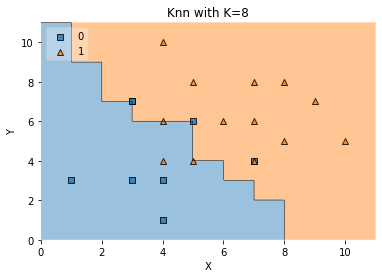

In [ ]:
 y_pred  =  clf.predict(x_test)
 ac = accuracy_score(y_test,y_pred)
 print("Using KNN the Accuracy is= ", ac)
# Plotting decision region
 plot_decision_regions(x_train, y_train, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel("X")
 plt.ylabel("Y")
 plt.title("Knn with K=8")
 plt.show()

##貝氏

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
#Predict Output
predicted= classifier.predict([[6,5]]) # 0:+, 1:-
print("Predicted Value:", predicted)

Predicted Value: [1]


In [ ]:
y_pred  =  classifier.predict(X_test)
print(y_pred)
print(y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print("Using Bayes the Accuracy is=",ac)

[1 1 0]
[0 1 0]
[[1 1]
 [0 1]]
Using Bayes the Accuracy is= 0.6666666666666666


##KNN用其他檔案執行


https://www.kaggle.com/datasets/gkalpolukcu/knn-algorithm-dataset

In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
data = pd.read_csv("KNNAlgorithmDataset.csv")
data

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1
...,...,...,...
564,21.56,22.39,1
565,20.13,28.25,1
566,16.60,28.08,1
567,20.60,29.33,1


In [ ]:
X = data.iloc[:, [0, 1]].values
print(X)
y = data.iloc[:, -1].values
print(y)

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0

In [ ]:
#指定K=20
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)
clf = neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train, y_train)
print("Predict Output for k=20 is",clf.predict([(6,5)]))

Predict Output for k=20 is [0]


In [ ]:
#cross validation using 10 folds,cv=10
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
k_list= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
cv_scores=[]

for i in k_list:
    cross_neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cross_neigh,x_train, y_train,cv=20)#cv=20 分成20組
    cv_scores.append(np.mean(scores))

print(len(cv_scores))
print(cv_scores)
print('最高為:',max(cv_scores))

20
[0.8516153846153847, 0.8612307692307694, 0.8611538461538462, 0.8631538461538462, 0.8766153846153845, 0.867, 0.8785384615384617, 0.8727692307692306, 0.8746153846153847, 0.8863076923076922, 0.8824615384615384, 0.8921538461538463, 0.8901538461538461, 0.8882307692307693, 0.8920769230769231, 0.8901538461538463, 0.8920769230769231, 0.8940769230769231, 0.8979230769230769, 0.9018461538461539]
最高為: 0.9018461538461539


Using KNN the Accuracy is=  0.8947368421052632


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


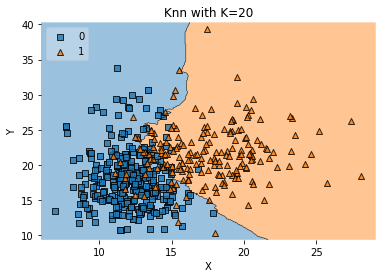

In [ ]:
 y_pred  =  clf.predict(x_test)
 ac = accuracy_score(y_test,y_pred)
 print("Using KNN the Accuracy is= ", ac)
# Plotting decision region
 plot_decision_regions(x_train, y_train, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel("X")
 plt.ylabel("Y")
 plt.title("Knn with K=20")
 plt.show()

##貝氏用其他檔案執行

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
#Predict Output
predicted= classifier.predict([[6,5]]) # 0:+, 1:-
print("Predicted Value:", predicted)

Predicted Value: [0]


In [ ]:
y_pred  =  classifier.predict(X_test)
print(y_pred)
print(y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print("Using Bayes the Accuracy is=",ac)

[1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1]
[1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1]
[[19  4]
 [ 1 33]]
Using Bayes the Accuracy is= 0.9122807017543859


##總結

#執行程式完，此檔案比較適合用貝氏進行分類，
#因為效果比較好且執行速度較快
#用KNN時需要多計算比較適合的鄰近值
#如果再資料量的情況會顯得程式比較慢

#使用SVM分類

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

data = pd.read_csv('/content/KNNAlgorithmDataset.csv')
data

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1
...,...,...,...
564,21.56,22.39,1
565,20.13,28.25,1
566,16.60,28.08,1
567,20.60,29.33,1


In [ ]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [ ]:
svc.fit(data[['radius_mean', 'texture_mean']], data['diagnosis'])
svc.score(data[['radius_mean', 'texture_mean']], data['diagnosis'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8875219683655536

In [ ]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['radius_mean', 'texture_mean']], data['diagnosis'])
svc2.score(data[['radius_mean', 'texture_mean']], data['diagnosis'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8945518453427065

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

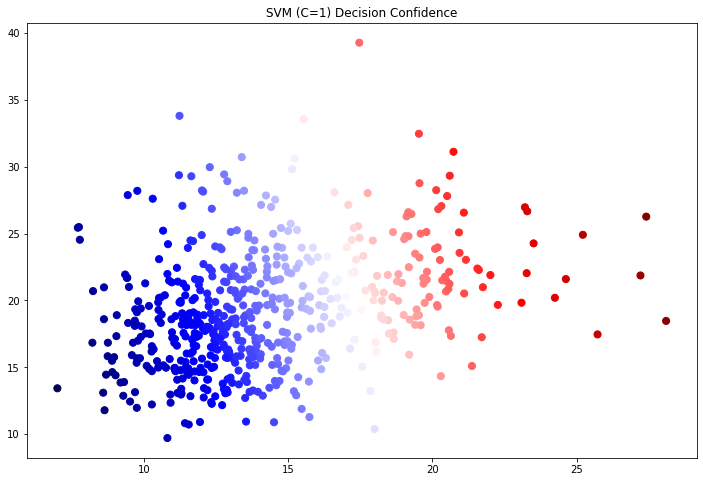

In [ ]:
data['SVM 1 Confidence'] = svc.decision_function(data[['radius_mean', 'texture_mean']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['radius_mean'], data['texture_mean'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

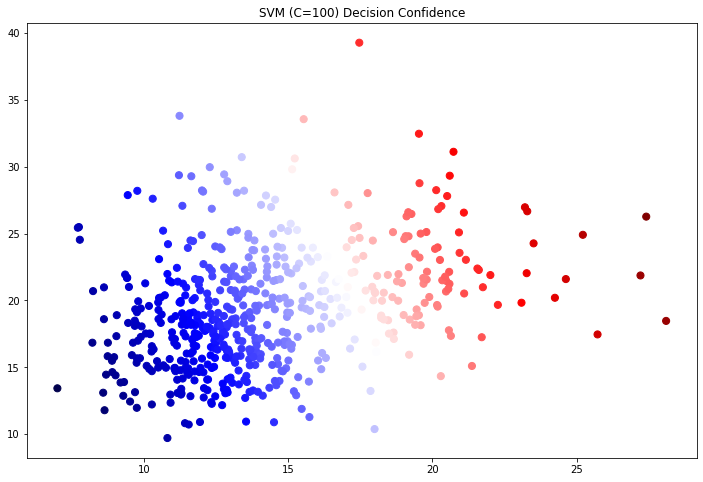

In [ ]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['radius_mean', 'texture_mean']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['radius_mean'], data['texture_mean'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')